In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Logistic regression

Логистическая регрессия является широко используемой статистической моделью, которая использует логистическую функцию для моделирования зависимости выходной переменной от набора входных в случае, когда зависимая переменная является бинарной. Данная модель оценивает вероятность того, что зависимая переменная примет одно из возможных бинарных значений.

Формула логистической регрессии:

$$ f(z) = \frac{1}{1+e^{-z}},\ где\ z = \theta^Tx = \theta_0 + \theta_1x_1 + ... + \theta_nx_x$$

Здесь 
* $\theta$ - вектор параметров логистической регрессии
* x - независимые переменные
* f - логистическая функция (сигмоид)

Распределение вероятностей:

$$ P\{y | x\} = f(\theta^Tx)^y(1-f(\theta^Tx))^{1-y}$$

Для подбора параметров обычно используется метод максимального правдоподобия, согласно которому выбираются параметры $\theta$ , максимизирующие значение функции правдоподобия на обучающей выборке.

$$ \hat\theta = argmax_\theta L(\theta) $$

где L - функция правдоподобия.

В нашем случае функция правдоподобия примет вид: 

$$ L(\theta)=\prod_{i=1}^m P \{ y = y^i | x = x^i \} $$

## Load dataset

Breast Cancer Dataset

Ten real-valued features are computed for each cell nucleus:

<br>a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

In [7]:
features.shape, target.shape

((569, 30), (569,))

In [8]:
# result classes (interpretation of 0 and 1)
target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
df_data = np.concatenate((features, target.reshape(569, 1)), axis=1)
df_data.shape

(569, 31)

In [10]:
col_names = np.concatenate((feature_names, ['result']))

In [11]:
df = pd.DataFrame(data=df_data, columns=col_names)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.loc[:, 'texture error']

0      0.9053
1      0.7339
2      0.7869
3      1.1560
4      0.7813
        ...  
564    1.2560
565    2.4630
566    1.0750
567    1.5950
568    1.4280
Name: texture error, Length: 569, dtype: float64

In [11]:
# check if there is null cells
df.isnull().values.any()

False

## Build correlation matrix and get rid of redundant features

<AxesSubplot:>

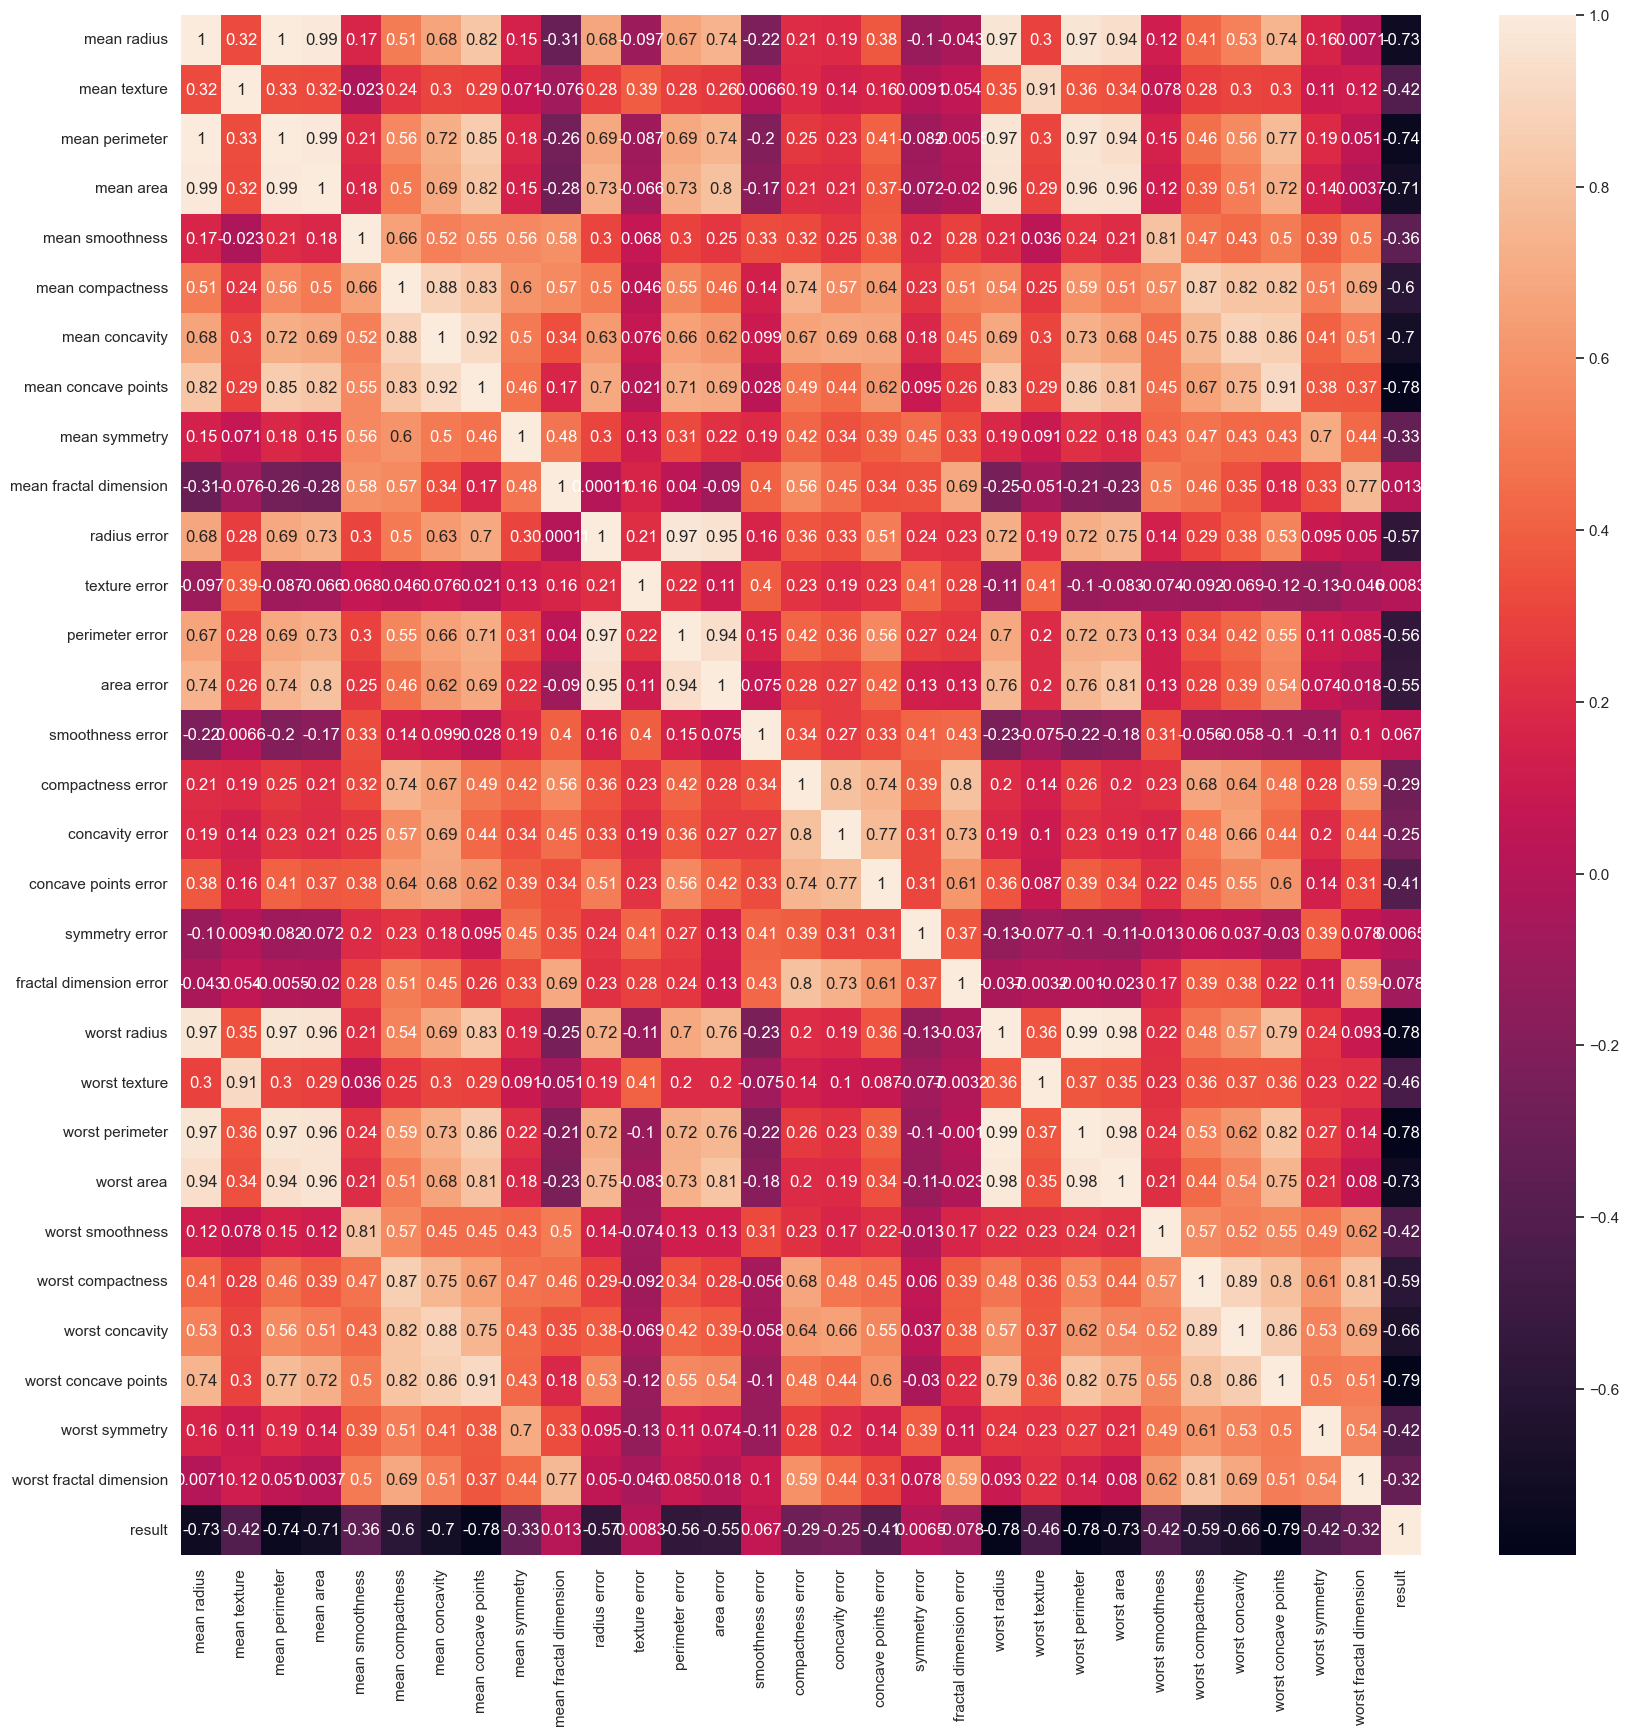

In [16]:
plt.figure(figsize=[20, 20])
sns.heatmap(df.corr(), annot=True)

In [17]:
def get_correlation_pairs(data_frame):
    abs_correlation_matrix = data_frame.corr().abs()
    sorted_pairs = abs_correlation_matrix.unstack().sort_values(ascending=False)
    return sorted_pairs

In [18]:
features_df = pd.DataFrame(features, columns=feature_names)
features_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
sorted_pairs = get_correlation_pairs(features_df)

In [20]:
sorted_pairs[sorted_pairs > 0.7]

mean radius          mean radius            1.000000
compactness error    compactness error      1.000000
mean area            mean area              1.000000
mean smoothness      mean smoothness        1.000000
mean compactness     mean compactness       1.000000
                                              ...   
mean perimeter       mean concavity         0.716136
worst radius         radius error           0.715065
radius error         worst radius           0.715065
perimeter error      mean concave points    0.710650
mean concave points  perimeter error        0.710650
Length: 170, dtype: float64

In [21]:
#too high correlation (x >= 0.9)
sorted_pairs[sorted_pairs >= 0.9]

mean radius           mean radius             1.000000
compactness error     compactness error       1.000000
mean area             mean area               1.000000
mean smoothness       mean smoothness         1.000000
mean compactness      mean compactness        1.000000
                                                ...   
mean concave points   mean concavity          0.921391
mean texture          worst texture           0.912045
worst texture         mean texture            0.912045
worst concave points  mean concave points     0.910155
mean concave points   worst concave points    0.910155
Length: 72, dtype: float64

In [22]:
#high correlation (0.7 < x < 0.9)
sorted_pairs[sorted_pairs > 0.7][sorted_pairs < 0.9]

worst compactness    worst concavity        0.892261
worst concavity      worst compactness      0.892261
mean concavity       worst concavity        0.884103
worst concavity      mean concavity         0.884103
mean concavity       mean compactness       0.883121
                                              ...   
mean perimeter       mean concavity         0.716136
worst radius         radius error           0.715065
radius error         worst radius           0.715065
perimeter error      mean concave points    0.710650
mean concave points  perimeter error        0.710650
Length: 98, dtype: float64

In [23]:
def get_redundant_columns(correlation_pairs, names, threshold=0.8):
    redundant_columns = set()
    checked = set()
    for name in names:
        pairs = correlation_pairs[name]
        checked.add(name)
        for i in range(len(pairs)):
            col = pairs.index[i]
            if (col not in redundant_columns and col not in checked):
                if (pairs[i] > threshold):
                    redundant_columns.add(col)
    return redundant_columns

In [24]:
redundant = get_redundant_columns(sorted_pairs, feature_names)
redundant

{'area error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

In [25]:
len(redundant)

17

In [26]:
optimal_df = df.drop(redundant, axis=1)

In [27]:
len(optimal_df.columns), len(df.columns)

(14, 31)

<AxesSubplot:>

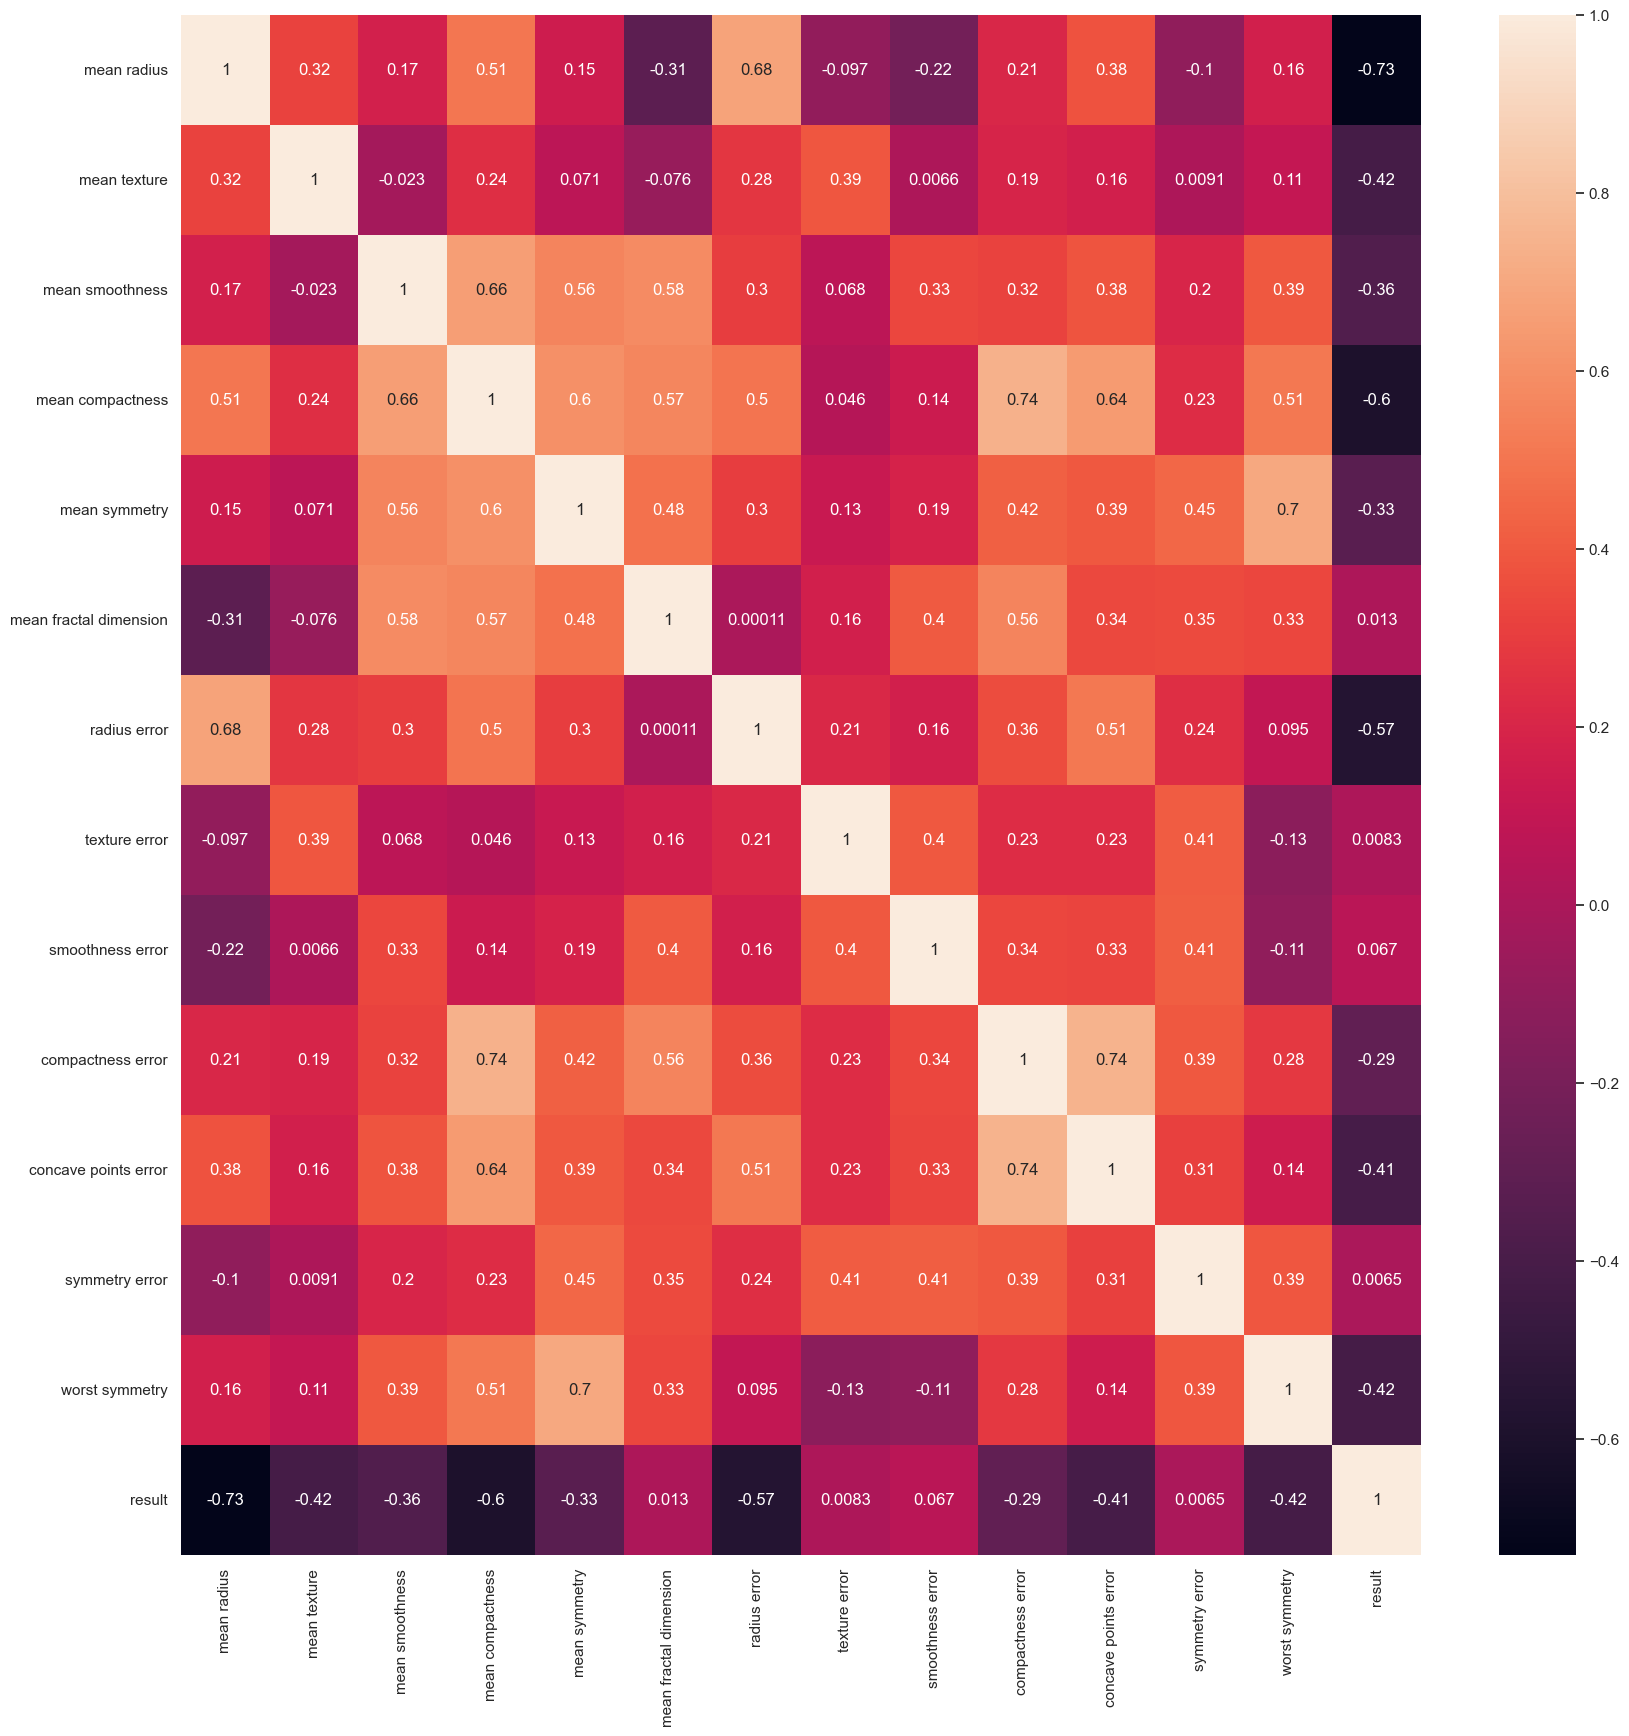

In [28]:
plt.figure(figsize=[20, 20])
sns.heatmap(optimal_df.corr(), annot=True)

In [102]:
X = optimal_df.drop(['result'], axis=1)
y = optimal_df['result']

## Normalization 
### $ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [103]:
X_norm = (X - np.min(X)) / (np.max(X) - np.min(X)).values

D:\University\env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\University\env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [104]:
X_norm.head(3)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.300625,0.311645,0.598462
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.253836,0.084539,0.233590
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.389847,0.205690,0.403706


## Split train and test sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=38)

In [106]:
X_train.shape, y_train.shape

((483, 13), (483,))

## Fit model & score

In [109]:
model = LogisticRegression(random_state=38, max_iter=500)

In [110]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=38)

### Metrics

![title](metrics.jpg)

In [112]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [113]:
test_prediction = model.predict(X_test)

<AxesSubplot:>

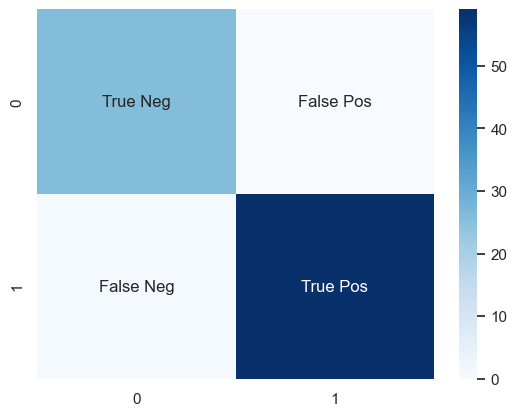

In [116]:
conf_mtrx = confusion_matrix(y_test, test_prediction)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mtrx, annot=labels, fmt='', cmap='Blues')

In [111]:
print('train accuracy = ', model.score(X_train, y_train))
print('test accuracy = ', model.score(X_test, y_test))

train accuracy =  0.9006211180124224
test accuracy =  0.9883720930232558


In [114]:
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)

In [115]:
print('precision = ', precision)
print('recall = ', recall)

precision =  1.0
recall =  0.9833333333333333


## Make certain prediction

In [117]:
y_test[:5]

35     0.0
50     1.0
475    1.0
218    0.0
566    0.0
Name: result, dtype: float64

In [118]:
X_test.head(5)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
35,16.74,21.59,0.09610,0.13360,0.1896,0.05656,0.4615,0.9197,0.005776,0.024990,0.011950,0.02789,0.4863
50,11.76,21.60,0.08637,0.04966,0.1495,0.05888,0.4062,1.2100,0.005857,0.009758,0.007445,0.02406,0.2433
475,12.83,15.73,0.09040,0.08269,0.1705,0.05913,0.1499,0.4875,0.004873,0.017960,0.008360,0.01601,0.3006
218,19.80,21.56,0.09383,0.13060,0.2094,0.05581,0.9553,1.1860,0.006804,0.031690,0.017120,0.01897,0.3070
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.037310,0.015570,0.01318,0.2218


In [119]:
test_sample1 = X_test.iloc[0]
y1 = int(y_test.iloc[0])
test_sample2 = X_test.iloc[1]
y2 = int(y_test.iloc[1])

In [120]:
t1 = np.array(test_sample1).reshape(1, 13)
t2 = np.array(test_sample2).reshape(1, 13)

In [121]:
t1 = pd.DataFrame(data=t1, columns=X.columns)
t2 = pd.DataFrame(data=t2, columns=X.columns)

In [122]:
prediction1 = model.predict(t1)
prediction1 = int(prediction1[0])

In [123]:
prediction1, y1

(0, 0)

In [124]:
print('predicted = ', target_names[prediction1], ', real = ', target_names[y1])

predicted =  malignant , real =  malignant


In [125]:
prediction2 = model.predict(t2), y2
prediction2 = int(prediction2[0])

In [126]:
prediction2, y2

(1, 1)

In [127]:
print('predicted = ', target_names[prediction2], ', real = ', target_names[y2])

predicted =  benign , real =  benign
